In [4]:
#import all relevant libraries / packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#

In [5]:
#upload csv file
from google.colab import files
uploaded = files.upload()

Saving AmazonSalesData.csv to AmazonSalesData.csv


In [6]:
#read the CSV into dataframe
df = pd.read_csv('AmazonSalesData.csv')
df.head() #will give the headings

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


This dataset provides detailed information on sales transactions across various regions, countries, and product types, including Baby Food, Cereal, Office Supplies, and Fruits. It includes attributes such as sales channel (online or offline), order priority, and dates of orders and shipments. Financial metrics like units sold, unit price, unit cost, total revenue, total cost, and total profit are also included, offering insights into the sales performance and profitability of different products and regions. This dataset is valuable for analyzing sales trends, revenue generation, and profit margins.








In [14]:
#Descriptive Statistics
#Calculating and displaying the descriptive statistics for the numerical variables in the dataset
simple_descriptive_stats = df.describe()
simple_descriptive_stats

,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
count,1.000000e+02,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02,1.000000e+02
mean,5.550204e+08,5128.710000,276.761300,191.048000,1.373488e+06,9.318057e+05,4.416820e+05
std,2.606153e+08,2794.484562,235.592241,188.208181,1.460029e+06,1.083938e+06,4.385379e+05
min,1.146066e+08,124.000000,9.330000,6.920000,4.870260e+03,3.612240e+03,1.258020e+03
25%,3.389225e+08,2836.250000,81.730000,35.840000,2.687212e+05,1.688680e+05,1.214436e+05
50%,5.577086e+08,5382.500000,179.880000,107.275000,7.523144e+05,3.635664e+05,2.907680e+05
75%,7.907551e+08,7369.000000,437.200000,263.330000,2.212045e+06,1.613870e+06,6.358288e+05
max,9.940222e+08,9925.000000,668.270000,524.960000,5.997055e+06,4.509794e+06,1.719922e+06


Descriptive statistics for the dataset show the central tendency and variability in key metrics. The average units sold per transaction are approximately 5,129, with a mean unit price of $276.76 and a mean unit cost of $191.05. The standard deviation indicates considerable variation, particularly in units sold, unit price, and total profit, reflecting the diverse nature of sales transactions. The total revenue per transaction averages around $1.37 million, with  total  profit averaging approximately $441,682, highlighting significant profit margins across different product types and regions.

In [15]:
#Correlation Analysis
correlation_units_profit = df[['Units Sold', 'Total Profit']].corr()
correlation_units_profit

,Units Sold,Total Profit
Units Sold,1.00000,0.56455
Total Profit,0.56455,1.00000


from matplotlib import pyplot as plt
correlation_units_profit['Units Sold'].plot(kind='hist', bins=20, title='Units Sold')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
correlation_units_profit['Total Profit'].plot(kind='hist', bins=20, title='Total Profit')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
correlation_units_profit.plot(kind='scatter', x='Units Sold', y='Total Profit', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Total Profit']
  ys = series['Units Sold']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = correlation_units_profit.sort_values('Total Profit', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Total Profit')
_ = plt.ylabel('Units Sold')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Total Profit']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Total Profit'}, axis=1)
              .sort_values('Total Profit', ascending=True))
  xs = counted['Total Profit']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = correlation_units_profit.sort_values('Total Profit', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Total Profit')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
correlation_units_profit['Units Sold'].plot(kind='line', figsize=(8, 4), title='Units Sold')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
correlation_units_profit['Total Profit'].plot(kind='line', figsize=(8, 4), title='Total Profit')
plt.gca().spines[['top', 'right']].set_visible(False)

Correlation analysis is essential for identifying the strength and direction of relationships between variables in a dataset. In this dataset, the Pearson correlation coefficient between 'Units Sold' and 'Total Profit' is approximately 0.565, indicating a moderate positive correlation. This suggests that as the number of units sold increases, the total profit also tends to increase. This positive relationship implies that higher sales volumes contribute to greater profitability, highlighting the importance of optimizing sales strategies to maximize profits in e-commerce settings.

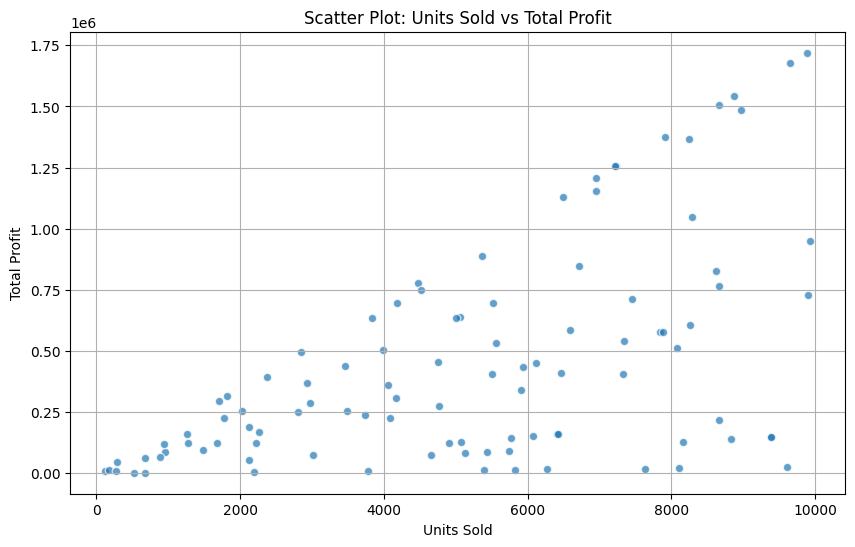

In [16]:
import matplotlib.pyplot as plt
#Scatter plot to visualize the relationship between 'Units Sold' and 'Total Profit'
plt.figure(figsize=(10, 6))
plt.scatter(df['Units Sold'], df['Total Profit'], alpha=0.7, edgecolors='w')
plt.title('Scatter Plot: Units Sold vs Total Profit')
plt.xlabel('Units Sold')
plt.ylabel('Total Profit')
plt.grid(True)
plt.show()

The scatter plot above illustrates the relationship between 'Units Sold' and 'Total Profit'. Each point represents a transaction, showing how variations in the number of units sold correlate with changes in total profit. The upward trend suggests a positive relationship: as more units are sold, total profit generally increases. However, the spread of points also indicates some variability, with certain sales generating significantly higher profits for similar unit sales. This pattern underscores the potential influence of other factors, such as unit price or cost, on profit outcomes.

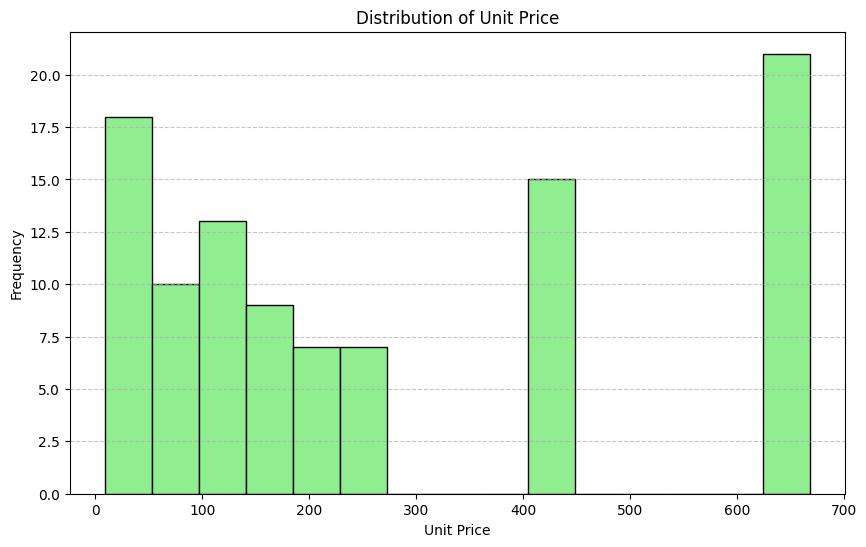

In [18]:
#Histogram to visualize the distribution of 'Unit Price'
plt.figure(figsize=(10, 6))
plt.hist(df['Unit Price'], bins=15, color='lightgreen', edgecolor='black')
plt.title('Distribution of Unit Price')
plt.xlabel('Unit Price')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

The histogram illustrates the distribution of unit prices across different products. The data shows that unit prices are concentrated in a few specific ranges, with a noticeable peak around the lower price range, indicating a higher frequency of transactions involving products priced modestly. Fewer transactions occur at higher price points, reflecting possibly higher-value or specialized items. This distribution suggests that the market may be more competitive in lower price segments, with a larger volume of sales, while premium products cater to a more niche market segment.

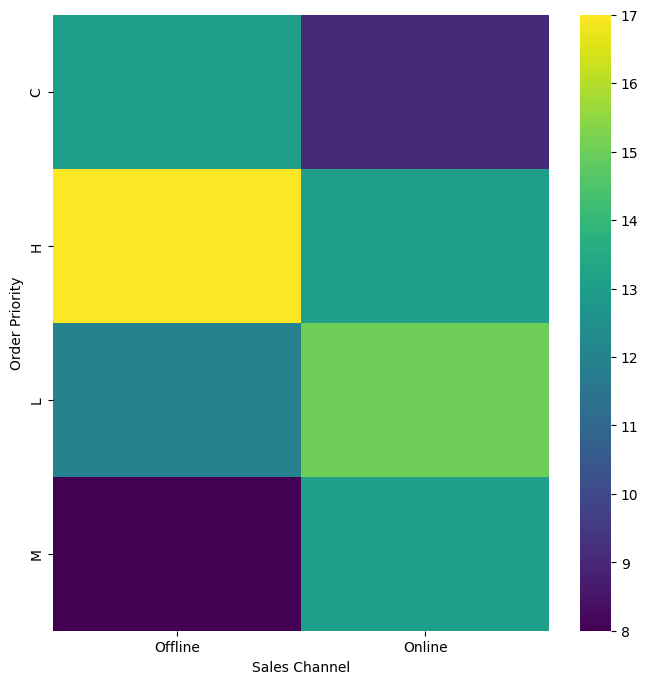

In [ ]:
# @title Sales Channel vs Order Priority

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Order Priority'].value_counts()
    for x_label, grp in df.groupby('Sales Channel')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Sales Channel')
_ = plt.ylabel('Order Priority')

<Figure size 1000x600 with 0 Axes>

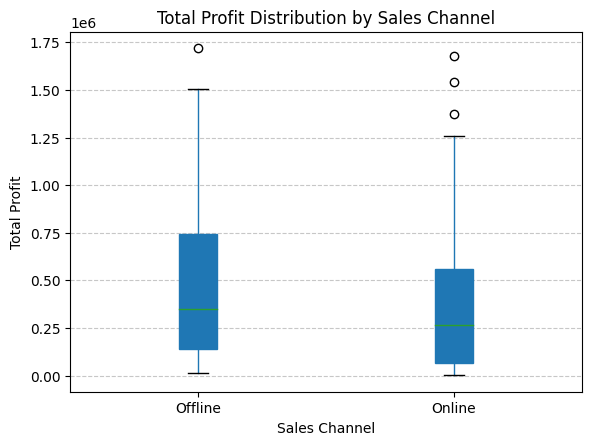

In [19]:
#Box plot to compare the total profit across different sales channels
plt.figure(figsize=(10, 6))
df.boxplot(column='Total Profit', by='Sales Channel', grid=False, patch_artist=True)
plt.title('Total Profit Distribution by Sales Channel')
plt.suptitle('')  # Remove the default subtitle
plt.xlabel('Sales Channel')
plt.ylabel('Total Profit')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

The box plot compares the distribution of total profit across different sales channels, distinguishing between online and offline transactions. The plot reveals that offline sales tend to have a wider range and higher median total profit compared to online sales, indicating that offline transactions are generally more profitable. The presence of outliers in both channels suggests variability in profit, possibly due to high-value transactions or significant price variations. This analysis highlights the importance of understanding channel-specific dynamics in maximizing profitability and tailoring marketing strategies.

#Create Pie Chart

Text(0, 0.5, '')

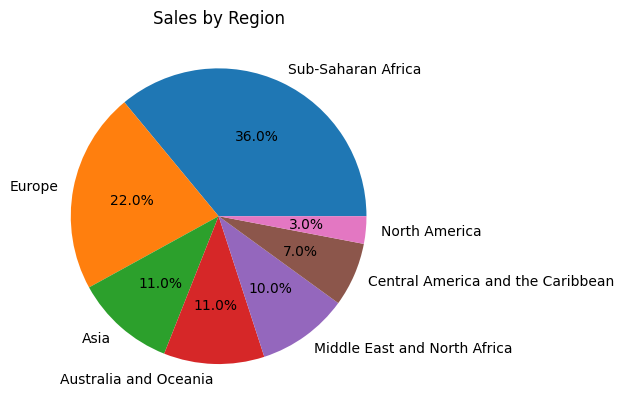

In [22]:
#Create pie chart with region sale
df['Region'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='Sales by Region')
plt.ylabel('')
#

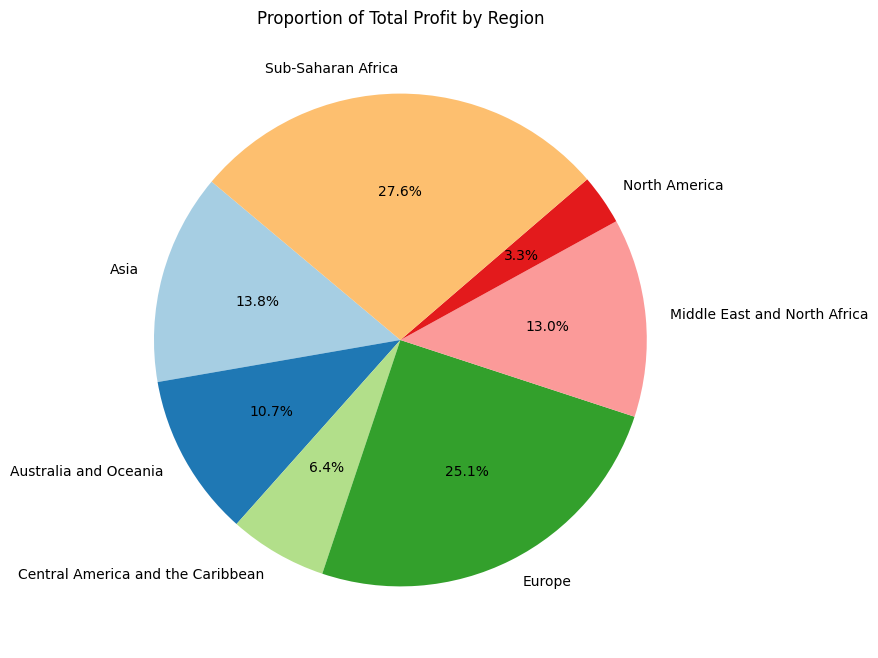

In [20]:
#Pie chart to show the proportion of total profit by region
total_profit_by_region = df.groupby('Region')['Total Profit'].sum()
plt.figure(figsize=(12, 8))
total_profit_by_region.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Proportion of Total Profit by Region')
plt.ylabel('')  # Hide the y-label
plt.show()

The pie chart illustrates the proportion of total profit contributed by each region. The chart reveals that certain regions, such as Sub-Saharan Africa and Australia and Oceania, contribute significantly to total profits, while others have smaller shares. This distribution highlights regional differences in sales performance and profitability, suggesting that certain markets may be more lucrative or have greater demand for specific products.

#Create a Bar Chart

<Axes: title={'center': 'Total Revenue by Region'}, xlabel='Region'>

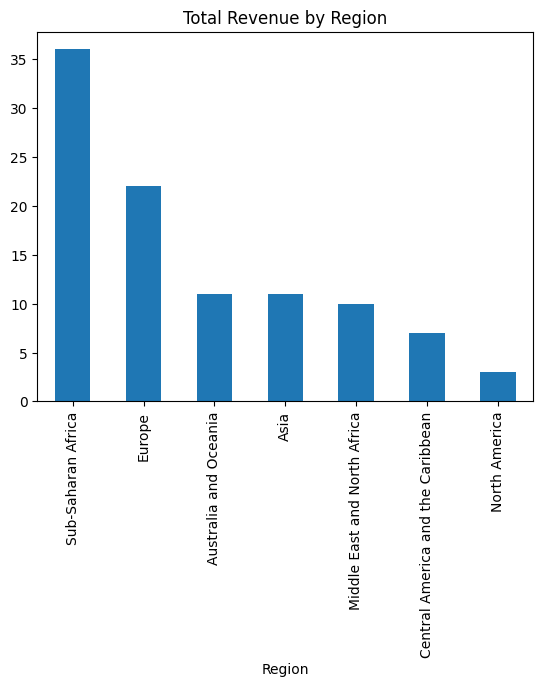

In [9]:
#Create a bar chart with sum of total revenues in each region and include title
df['Region'].value_counts().plot(kind='bar', title='Total Revenue by Region')
#df.groupby('Region')['Total Revenue'].sum().plot(kind='bar')
#

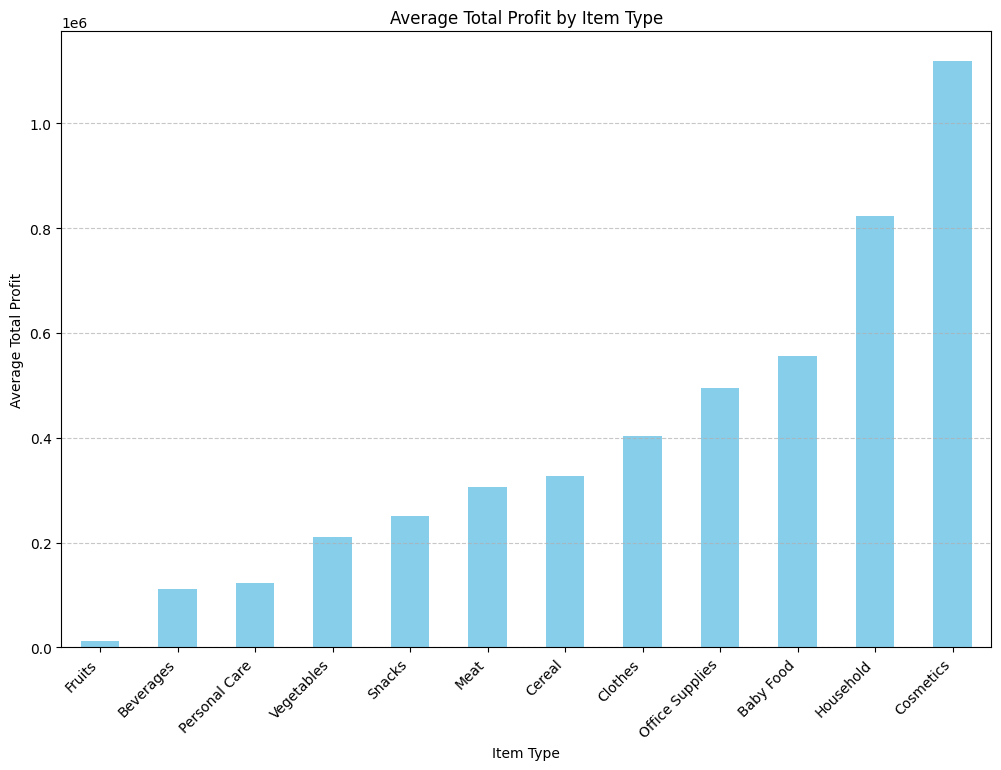

In [ ]:
#Let's creat a bar chart to visualize the average total profit by item type
average_profit_by_item = df.groupby('Item Type')['Total Profit'].mean().sort_values()
plt.figure(figsize=(12, 8))
average_profit_by_item.plot(kind='bar', color='skyblue')
#Add titles and labels
plt.title('Average Total Profit by Item Type')
plt.xlabel('Item Type')
plt.ylabel('Average Total Profit')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

The bar chart displays the average total profit for each item type sold. The data reveals significant variations in profitability across different products. Notably, items such as 'Office Supplies' and 'Personal Care' generate the highest average profits, while 'Snacks' and 'Beverages' yield lower profits. This pattern indicates that some product categories are more lucrative than others, likely due to factors such as pricing strategies, cost structures, and consumer demand.

#Stacked Bar Chart

In [10]:
#Import needed libraries
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [11]:
#Ensure you have numeric and categorical data defined
df['Total Revenue']=pd.to_numeric(df['Total Revenue'])
df['Region']=df['Region'].astype('category')
df['Item Type']=df['Item Type'].astype('category')

In [12]:
#Pivot the data to get sales by region and category
df_pivot=df.pivot_table(index='Region', columns='Item Type', values='Total Revenue', aggfunc='sum')

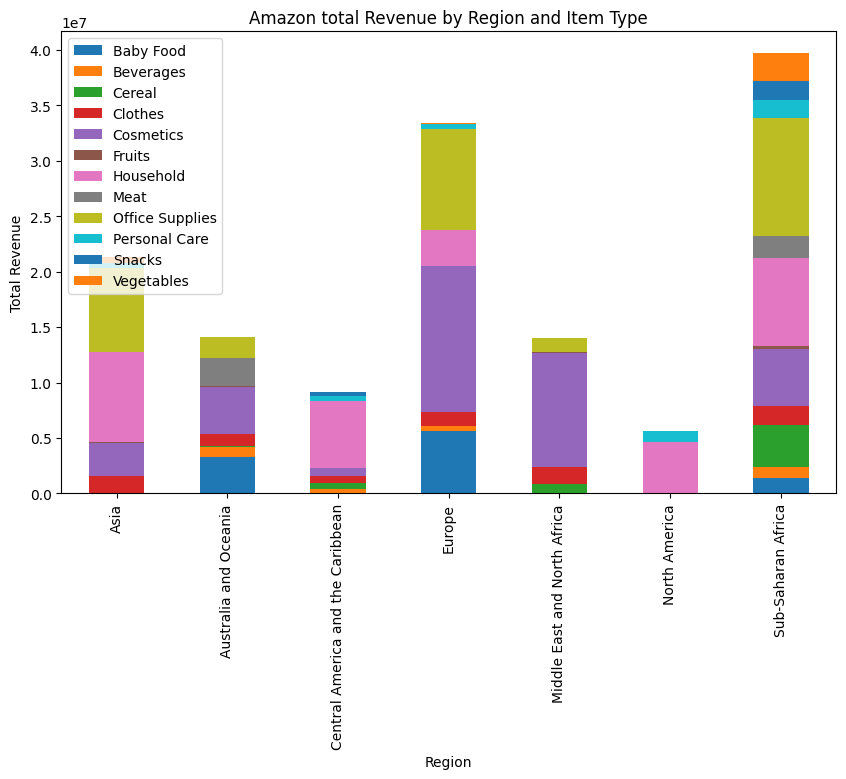

In [13]:
#Plot the stacked bar chart
df_pivot.plot(kind='bar', stacked=True, figsize=(10,6))
#Add titles and labels
plt.title('Amazon total Revenue by Region and Item Type')
plt.xlabel('Region')
plt.ylabel('Total Revenue')
plt.legend(loc='best')
plt.show()